## BIKI Analysis

This is a quick analyis for the public bicycle system in Montreal.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Import data
OD_2014 = pd.read_csv('../datasets/OD_2014.csv')
OD_2015 = pd.read_csv('../datasets/OD_2015.csv')
OD_2016 = pd.read_csv('../datasets/OD_2016.csv')
OD_2017 = pd.read_csv('../datasets/OD_2017.csv')
Stations_2014 = pd.read_csv('../datasets/Stations_2014.csv')
Stations_2015 = pd.read_csv('../datasets/Stations_2015.csv')
Stations_2016 = pd.read_csv('../datasets/Stations_2016.csv')
Stations_2017 = pd.read_csv('../datasets/Stations_2017.csv')

D:\Luismo\Documents\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Quick view

#### Total rides by year

Text(0.5, 0, 'Year')

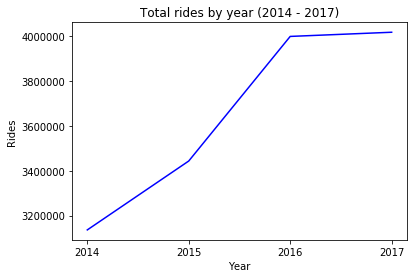

In [4]:
users_by_year = [len(OD_2014), len(OD_2015), len(OD_2016), len(OD_2017)]
labels = ['2014','2015','2016','2017']
plt.plot(users_by_year, color = 'b')
plt.title('Total rides by year (2014 - 2017)')
plt.xticks(range(4), labels)
plt.ylabel('Rides')
plt.xlabel('Year')

#### Number of stations by year

Text(0.5, 0, 'Year')

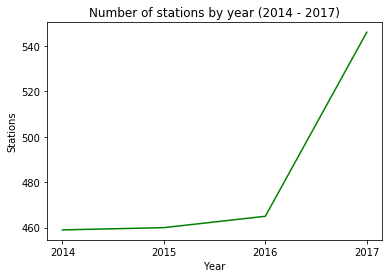

In [5]:
stations_by_year = [len(Stations_2014), len(Stations_2015), len(Stations_2016), len(Stations_2017)]
plt.plot(stations_by_year, color = 'g')
plt.title('Number of stations by year (2014 - 2017)')
plt.xticks(range(4), labels)
plt.ylabel('Stations')
plt.xlabel('Year')

## MEMBER AND NON-MEMBER ANALYSIS

### Total rides by members and non-members

In [6]:
member_rides_14 = OD_2014[OD_2014['is_member'] == 1]
member_rides_15 = OD_2015[OD_2015['is_member'] == 1]
member_rides_16 = OD_2016[OD_2016['is_member'] == 1]
member_rides_17 = OD_2017[OD_2017['is_member'] == 1]

non_member_rides_14 = OD_2014[OD_2014['is_member'] == 0]
non_member_rides_15 = OD_2015[OD_2015['is_member'] == 0]
non_member_rides_16 = OD_2016[OD_2016['is_member'] == 0]
non_member_rides_17 = OD_2017[OD_2017['is_member'] == 0]

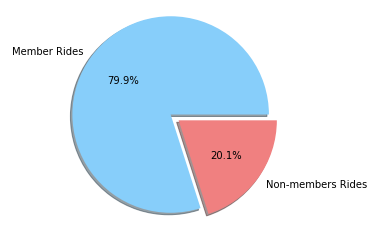

In [10]:
# Pie chart args
labels_pie = 'Member Rides', 'Non-members Rides'
sizes = [len(member_rides_17), len(non_member_rides_17)]
explode = (0, 0.1)
colors = ['lightskyblue', 'lightcoral']

# Pie chart generation
ax2014 = plt.subplot()
ax2014.pie(sizes, labels=labels_pie, explode=explode, autopct='%1.1f%%', shadow=True, startangle=0, colors=colors)
ax2014.axis('equal')

# Prints and plot

plt.show()

Total member rides: 12096519
Total non-member rides: 2502442


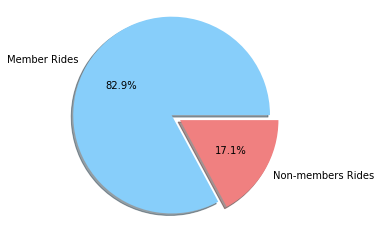

In [8]:
total_member_rides = len(member_rides_14) + len(member_rides_15) + len(member_rides_16) + len(member_rides_17)
total_non_member_rides = len(non_member_rides_14) + len(non_member_rides_15) + len(non_member_rides_16) + len(non_member_rides_17)

print("Total member rides: " + str(total_member_rides))
print("Total non-member rides: " + str(total_non_member_rides))

# Pie chart args
labels_pie = 'Member Rides', 'Non-members Rides'
sizes = [total_member_rides, total_non_member_rides]
explode = (0, 0.1)
colors = ['lightskyblue', 'lightcoral']

# Pie chart generation
ax1 = plt.subplot()
ax1.pie(sizes, labels=labels_pie, explode=explode, autopct='%1.1f%%', shadow=True, startangle=0, colors=colors)
ax1.axis('equal')

# Prints and plot

plt.show()

Rides by members over the years

In [12]:
member_rides_by_year = [len(member_rides_14), len(member_rides_15), len(member_rides_16), len(member_rides_17)]
non_member_rides_by_year = [len(non_member_rides_14), len(non_member_rides_15), len(non_member_rides_16), len(non_member_rides_17)]

Text(0.5, 0, 'Year')

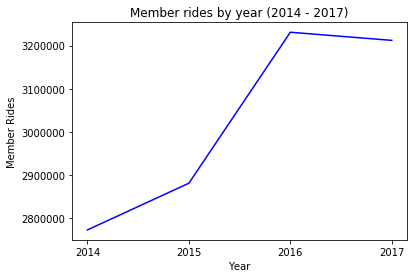

In [13]:
plt.plot(member_rides_by_year, color = 'b')
plt.title('Member rides by year (2014 - 2017)')
plt.xticks(range(4), labels)
plt.ylabel('Member Rides')
plt.xlabel('Year')

Text(0.5, 0, 'Year')

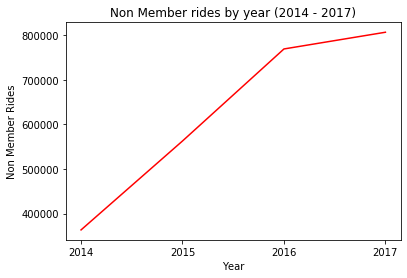

In [14]:
plt.plot(non_member_rides_by_year, color = 'r')
plt.title('Non Member rides by year (2014 - 2017)')
plt.xticks(range(4), labels)
plt.ylabel('Non Member Rides')
plt.xlabel('Year')

### Ride time mean by user type

In [15]:
data = {'Members': [member_rides_14['duration_sec'].mean(), 
                    member_rides_15['duration_sec'].mean(),
                    member_rides_16['duration_sec'].mean(),
                    member_rides_17['duration_sec'].mean()],
        'Non-members': [non_member_rides_14['duration_sec'].mean(), 
                        non_member_rides_15['duration_sec'].mean(),
                        non_member_rides_16['duration_sec'].mean(),
                        non_member_rides_17['duration_sec'].mean()]
        }

In [17]:
time_mean = pd.DataFrame(data=data, index=['2014', '2015', '2016','2017'])

Average time spent


,Members,Non-members
2014,725.001798,1283.516498
2015,733.737672,1283.836580
2016,740.341787,1246.020850
2017,740.645125,1222.872051


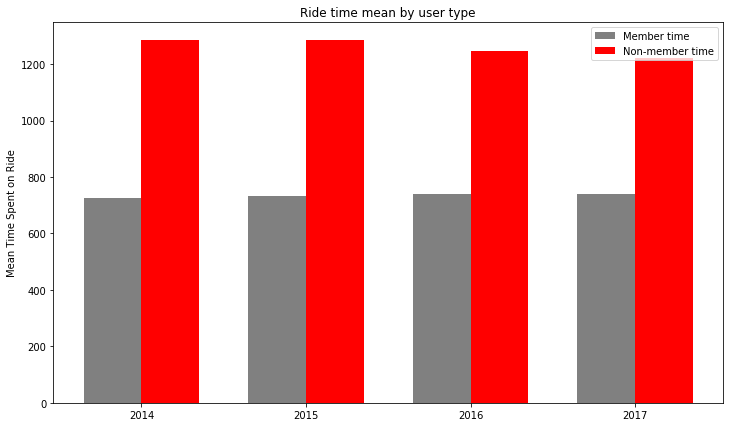

In [19]:
print("Average time spent")

N = 4
ind = np.arange(N)
width = 0.35

plt.figure(figsize=(12, 7))
plt.bar(ind, time_mean['Members'],  width, label='Member time', color="grey")
plt.bar(ind + width, time_mean['Non-members'], width, label='Non-member time', color="red")
plt.ylabel('Mean Time Spent on Ride')
plt.title('Ride time mean by user type')
plt.legend()
plt.xticks(ind + width / 2, time_mean.index)

time_mean

As we can see, non-member users use to have longer rides than member users.

#### Same start-end station by membership

In [20]:
same_start_end = OD_2017[OD_2017['start_station_code'] == OD_2017['end_station_code']]
print("Same ride path Members: " + str(len(same_start_end[same_start_end['is_member'] == 1])))
print("Same ride path Non-members: " + str(len(same_start_end[same_start_end['is_member'] == 0])))

Same ride path Members: 46726
Same ride path Non-members: 38136


## STATIONS

As we have seen before, the mayority of the stations were built from 2016 to 2017. 
Let´s see the specific stations and his traffic

In [21]:
Stations_2017.head()

,code,name,latitude,longitude,is_public
0,7060,de l'Église / de Verdun,45.463001,-73.571569,1
1,6173,Berri / Cherrier,45.519088,-73.569509,1
2,6203,Hutchison / Sherbrooke,45.507810,-73.572080,1
3,6204,Milton / Durocher,45.508144,-73.574772,1
4,6104,Wolfe / René-Lévesque,45.516818,-73.554188,1


In [22]:
Stations_2017['new'] = ~Stations_2017['code'].isin(Stations_2016['code'])


In [23]:
new_stations_2017 = Stations_2017[Stations_2017['new'] == True]
len(new_stations_2017)

81

There is 81 new stations built from 2016 to 2017.
Let´s see if the users used them.

#### Use of new stations as starting point

In [24]:
OD_2017.head()

,Unnamed: 0,start_date,start_station_code,end_date,end_station_code,duration_sec,is_member
0,0,2017-04-15 00:00,7060,2017-04-15 00:31,7060,1841,1
1,1,2017-04-15 00:01,6173,2017-04-15 00:10,6173,553,1
2,2,2017-04-15 00:01,6203,2017-04-15 00:04,6204,195,1
3,3,2017-04-15 00:01,6104,2017-04-15 00:06,6114,285,1
4,4,2017-04-15 00:01,6174,2017-04-15 00:11,6174,569,1


In [25]:
start_stations_use = OD_2017['start_station_code'].value_counts()
end_stations_use = OD_2017['end_station_code'].value_counts()

start_stations_count = pd.DataFrame({'station_code': start_stations_use.index, 'used_times_start': start_stations_use.values})
end_stations_count = pd.DataFrame({'station_code': end_stations_use.index, 'used_times_end': end_stations_use.values})



In [26]:
merged_stations_count = start_stations_count.merge(end_stations_count, how='inner', left_on='station_code', right_on='station_code')

In [27]:
merged_stations_count

,station_code,used_times_start,used_times_end
0,6100,47851,47052
1,6078,35479,40884
2,6184,34700,31635
3,6015,34688,51481
4,6064,32198,32481
...,...,...,...
541,7075,422,563
542,5005,419,546
543,5004,391,370
544,5002,337,424


In [28]:
new_stations_2017.head()

,code,name,latitude,longitude,is_public,new
0,7060,de l'Église / de Verdun,45.463001,-73.571569,1,True
23,7052,Shearer / Centre,45.483006,-73.562187,1,True
46,7056,Godin / Bannantyne,45.447554,-73.577263,1,True
51,7037,Prince-Arthur / Ste-Famille,45.511773,-73.574813,1,True
53,7027,Terrasse Guindon / Fullum,45.537105,-73.569144,1,True


In [29]:
new_stations_use = merged_stations_count.merge(new_stations_2017, how='right', left_on='station_code', right_on='code')

### Most used new stations

In [30]:
top_10_new_stations = new_stations_use.head(10)
top_10_new_stations

,station_code,used_times_start,used_times_end,code,name,latitude,longitude,is_public,new
0,7034,14344,12477,7034,Clark / Laurier,45.522584,-73.593589,1,True
1,7032,11634,8741,7032,Drolet / Laurier,45.526252,-73.589758,1,True
2,7038,9565,9167,7038,Clark / Guilbault,45.514393,-73.575042,1,True
3,7080,8569,8913,7080,President-Kennedy / Robert Bourassa,45.504407,-73.572543,1,True
4,7066,7956,10823,7066,St-Urbain / de la Gauchetière,45.507069,-73.561246,1,True
5,7026,7766,6914,7026,Maguire / Henri-Julien,45.527041,-73.593471,1,True
6,7045,7702,7471,7045,Casgrain / Mozart,45.534727,-73.614793,1,True
7,7028,7618,7384,7028,de Gaspé / St-Viateur,45.527748,-73.597439,1,True
8,7037,7172,6055,7037,Prince-Arthur / Ste-Famille,45.511773,-73.574813,1,True
9,7071,7027,4047,7071,St-Mathieu / Sherbrooke,45.495789,-73.582596,1,True


### Least used new stations

In [31]:
worse_10_new_stations = new_stations_use.tail(10)
worse_10_new_stations

,station_code,used_times_start,used_times_end,code,name,latitude,longitude,is_public,new
71,7002,1090,1404,7002,Tolhurst / Fleury,45.544101,-73.667386,1,True
72,7051,999,1223,7051,Jogues / Allard,45.449901,-73.600251,1,True
73,7003,997,963,7003,St-Charles / Sauvé,45.556065,-73.653502,1,True
74,7044,899,842,7044,Hôpital Santa Cabrini (St-Zotique / Jeanne-Jugan),45.579325,-73.570504,1,True
75,7001,893,891,7001,Ste-Catherine / Ste-Élisabeth,45.512283,-73.561826,1,True
76,7016,805,1091,7016,Sherbrooke / Langelier,45.582757,-73.542443,1,True
77,7062,722,769,7062,Nazareth / William,45.497024,-73.559223,1,True
78,7023,715,767,7023,CHSLD St-Michel (Jarry / 8e avenue),45.561690,-73.610512,1,True
79,7009,474,597,7009,CHSLD Benjamin-Victor-Rousselot (Dickson / She...,45.573798,-73.550345,1,True
80,7075,422,563,7075,CHSLD Éloria-Lepage (de la Pépinière / de Mars...,45.576944,-73.540453,1,True


### All stations in 2016

### Best and worse new stations

In [32]:
import geopandas as gpd

In [33]:
shp_file_path = '../montreal_bikes_map/reseau_cyclable.shp'
bike_paths = gpd.read_file(shp_file_path)

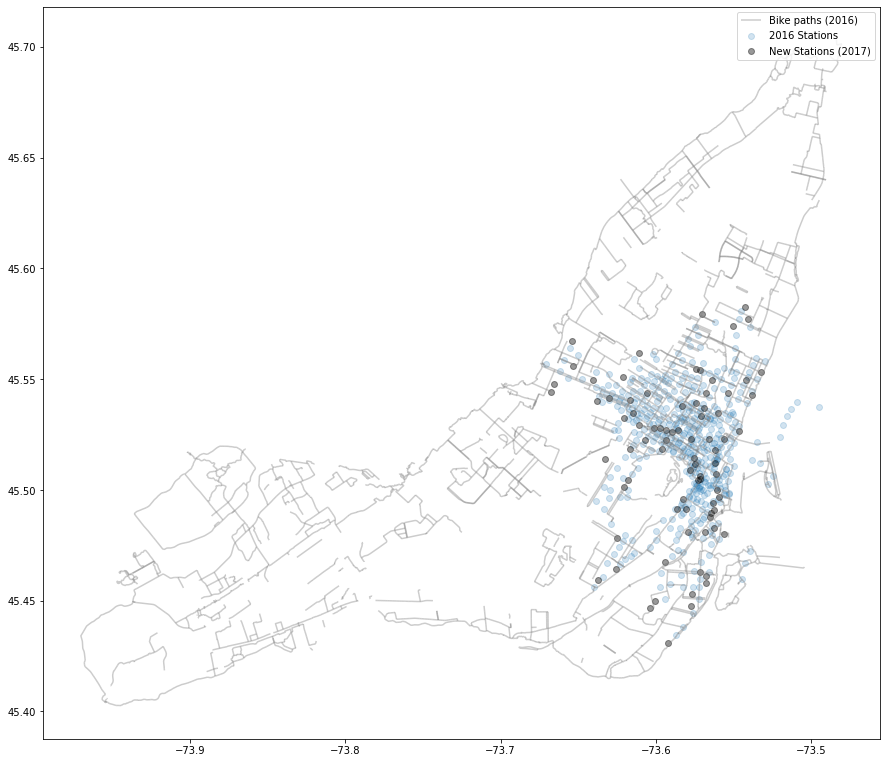

In [34]:
ax = bike_paths.plot(figsize=(15, 15), alpha=0.4, color='grey')
ax.scatter(x=Stations_2016['longitude'], y=Stations_2016['latitude'], alpha=0.2)
ax.scatter(x=new_stations_use['longitude'], y=new_stations_use['latitude'], alpha=0.4, color='black')
ax.legend(['Bike paths (2016)', '2016 Stations', 'New Stations (2017)'])

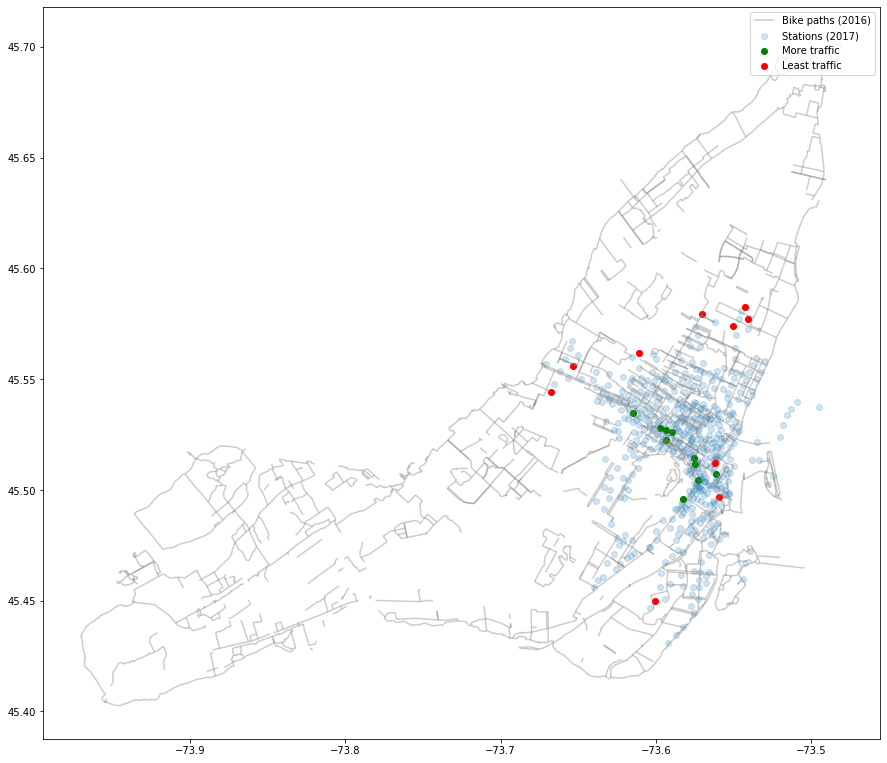

In [232]:
bike_paths = gpd.read_file(shp_file_path)
ax = bike_paths.plot(figsize=(15, 15), alpha=0.4, color='grey')
ax.scatter(x=Stations_2017['longitude'], y=Stations_2017['latitude'], alpha=0.2)
ax.scatter(x=top_10_new_stations['longitude'], y=top_10_new_stations['latitude'], color="green", alpha=1)
ax.scatter(x=worse_10_new_stations['longitude'], y=worse_10_new_stations['latitude'], color="red", alpha=1)
ax.legend(['Bike paths (2016)', 'Stations (2017)', 'More traffic', 'Least traffic'])



### Ride paths analysis

In [35]:
OD_2017.head()

,Unnamed: 0,start_date,start_station_code,end_date,end_station_code,duration_sec,is_member
0,0,2017-04-15 00:00,7060,2017-04-15 00:31,7060,1841,1
1,1,2017-04-15 00:01,6173,2017-04-15 00:10,6173,553,1
2,2,2017-04-15 00:01,6203,2017-04-15 00:04,6204,195,1
3,3,2017-04-15 00:01,6104,2017-04-15 00:06,6114,285,1
4,4,2017-04-15 00:01,6174,2017-04-15 00:11,6174,569,1


#### Number of different ride paths (start - end)

In [36]:
start_end_rides = OD_2017['start_station_code'].astype(str) + "_" + OD_2017['end_station_code'].astype(str)
start_end_df = pd.DataFrame({'start_station_code': OD_2017['start_station_code'],
                             'end_station_code': OD_2017['end_station_code'],
                             'concat': start_end_rides
                             
    
})

unique_rides = start_end_df.drop_duplicates(subset='concat' ,keep='first')
print("Different ride paths: " + str(len(unique_rides)))

Different ride paths: 189414


#### More frequent start-end paths

In [37]:
rides_count = start_end_df['concat'].value_counts()
rides_count_df = pd.DataFrame({'concat': rides_count.index,
                               'count': rides_count.values
    
})

start_end_df = start_end_df.merge(rides_count_df, on='concat', how='left')


In [38]:
start_end_df = start_end_df.drop_duplicates(subset='concat').sort_values(['count'], ascending=False)
start_end_df = start_end_df.drop(['concat'], axis=1)

In [39]:
start_end_df.reset_index(drop=True, inplace=True)
start_end_df

,start_station_code,end_station_code,count
0,6501,6501,2997
1,6026,6026,2529
2,6050,6406,2200
3,6406,6052,2199
4,6036,6036,2022
...,...,...,...
189409,6236,6005,1
189410,6116,7054,1
189411,6425,6502,1
189412,6719,7066,1


In [40]:
start_end_df[start_end_df['start_station_code'] == start_end_df['end_station_code']]

,start_station_code,end_station_code,count
0,6501,6501,2997
1,6026,6026,2529
4,6036,6036,2022
24,6023,6023,1319
35,6406,6406,1173
...,...,...,...
47819,6241,6241,20
49736,6106,6106,19
51862,7023,7023,18
53829,5003,5003,17


#### Station status analysis

In [208]:
import json

In [200]:
stations_json_path = '../datasets/stations.json'

In [201]:
with open(stations_json_path) as f:
    data = json.load(f)

In [206]:
stations_df = pd.DataFrame(data['stations'])

#### Bikes availability - All stations

Text(0.5, 1, 'Bike Availability')

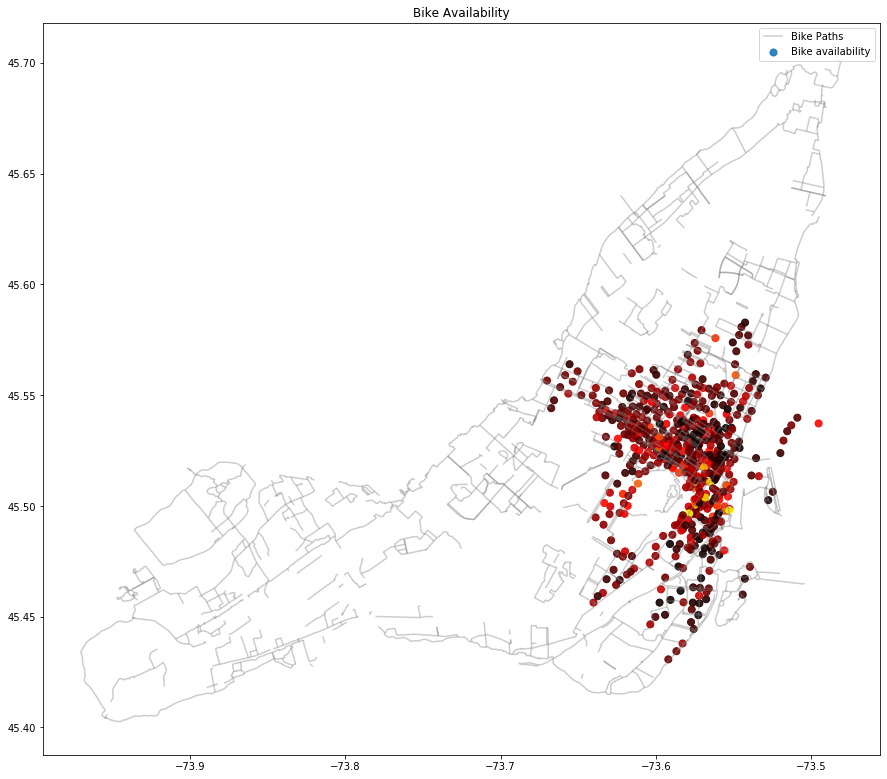

In [286]:
bike_paths = gpd.read_file(shp_file_path)
ax = bike_paths.plot(figsize=(15, 15), alpha=0.4, color='grey')
ax.scatter(x=stations_df['lo'], y=stations_df['la'], alpha=0.9, c=stations_df['ba'], s=50, cmap='hot')
ax.legend(['Bike Paths', 'Bike availability'])
ax.set_title('Bike Availability')

#### Number of stations with 0 bikes available

In [281]:
print(len(least_bikes_avlb))

21


#### Best and worst stations - Bike Availability

In [279]:
#### Best and worst stations - Bike Availability = stations_df[stations_df['ba'] == 0]
most_bikes_avlb = stations_df.sort_values(['ba'], ascending=True).tail(30)

In [279]:
least_bikes_avlb = stations_df[stations_df['ba'] == 0]
most_bikes_avlb = stations_df.sort_values(['ba'], ascending=True).tail(30)

Text(0.5, 1, 'Best and worst stations - Bike Availability')

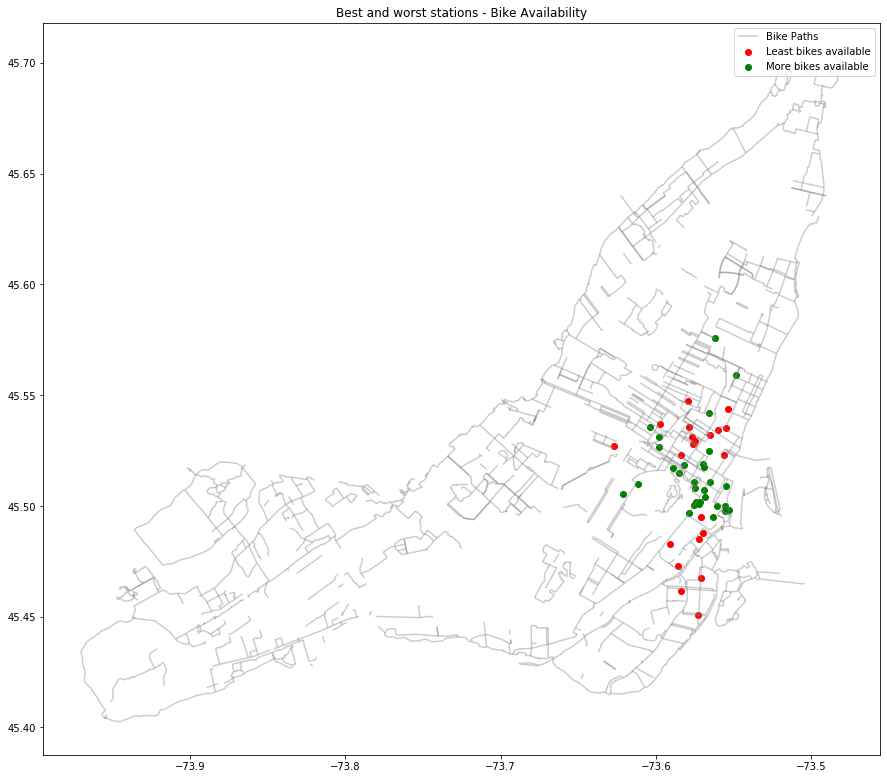

In [280]:
bike_paths = gpd.read_file(shp_file_path)
ax = bike_paths.plot(figsize=(15, 15), alpha=0.4, color='grey')
ax.scatter(x=least_bikes_avlb['lo'], y=least_bikes_avlb['la'], alpha=1, color='red')
ax.scatter(x=most_bikes_avlb['lo'], y=most_bikes_avlb['la'], alpha=1, color='green')
ax.legend(['Bike Paths', 'Least bikes available', 'More bikes available'])
ax.set_title('Best and worst stations - Bike Availability')

